In [ ]:
# MOUNT THE DRIVE
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT OS MODULE: **To interact with the underlying operating system**

In [ ]:
import os   
# os module in python provides functions for creating and removing a folder,
# fetching its content,changing and identifying the current dir etc

In [ ]:
from skimage.io import imread   
# skikit-image is an open source python package used for image processing
# imread function to read images to a form usable in python program

In [ ]:
from skimage.transform import resize

In [ ]:
os.listdir("/content/drive/MyDrive/MASK_SVM")

['MASKS_OFF', 'MASKS_ON']

In [ ]:
len(os.listdir("/content/drive/MyDrive/MASK_SVM/MASKS_OFF"))

144

In [ ]:
len(os.listdir("/content/drive/MyDrive/MASK_SVM/MASKS_ON"))

180

In [ ]:
# ASSIGN A VARIABLE FOR EACH PATH
on_path=os.path.join("/content/drive/MyDrive/MASK_SVM","MASKS_ON")
off_path=os.path.join("/content/drive/MyDrive/MASK_SVM","MASKS_OFF")

In [ ]:
# DISPLAY CONTENT IN BOTH PATHS
for i in os.listdir(on_path):
  print(i)

with_mask_111.jpg
with_mask_185.jpg
with_mask_182.jpg
with_mask_189.jpg
with_mask_174.jpg
with_mask_113.jpg
with_mask_62.jpg
with_mask_57.jpg
with_mask_127.jpg
with_mask_9.jpg
with_mask_149.jpg
with_mask_65.jpg
with_mask_115.jpg
with_mask_28.jpg
with_mask_261.jpg
with_mask_186.jpg
with_mask_257.jpg
with_mask_119.jpg
with_mask_169.jpg
with_mask_137.jpg
with_mask_259.jpg
with_mask_208.jpg
with_mask_203.jpg
with_mask_94.jpg
with_mask_5.jpg
with_mask_228.jpg
with_mask_41.jpg
with_mask_102.jpg
with_mask_253.jpg
with_mask_206.jpg
with_mask_61.jpg
with_mask_114.jpg
with_mask_129.jpg
with_mask_76.jpg
with_mask_30.jpg
with_mask_170.jpg
with_mask_172.jpg
with_mask_135.jpg
with_mask_12.jpg
with_mask_82.jpg
with_mask_80.jpg
with_mask_222.jpg
with_mask_42.jpg
with_mask_27.jpg
with_mask_84.jpg
with_mask_146.jpg
with_mask_225.jpg
with_mask_25.jpg
with_mask_245.jpg
with_mask_118.jpg
with_mask_43.jpg
with_mask_136.jpg
with_mask_109.jpg
with_mask_204.jpg
with_mask_150.jpg
with_mask_60.jpg
with_mask_116.

In [ ]:
for i in os.listdir(off_path):
  print(i)

without_mask_117.jpg
without_mask_1.jpg
without_mask_60.jpg
without_mask_135.jpg
without_mask_141.jpg
without_mask_9.jpg
without_mask_115.jpg
without_mask_90.jpg
without_mask_144.jpg
without_mask_29.jpg
without_mask_45.jpg
without_mask_133.jpg
without_mask_66.jpg
without_mask_11.jpg
without_mask_85.jpg
without_mask_70.jpg
without_mask_134.jpg
without_mask_15.jpg
without_mask_97.jpg
without_mask_39.jpg
without_mask_25.jpg
without_mask_48.jpg
without_mask_105.jpg
without_mask_143.jpg
without_mask_51.jpg
without_mask_98.jpg
without_mask_122.jpg
without_mask_89.jpg
without_mask_120.jpg
without_mask_31.jpg
without_mask_114.jpg
without_mask_100.jpg
without_mask_20.jpg
without_mask_132.jpg
without_mask_63.jpg
without_mask_87.jpg
without_mask_67.jpg
without_mask_61.jpg
without_mask_3.jpg
without_mask_13.jpg
without_mask_112.jpg
without_mask_140.jpg
without_mask_116.jpg
without_mask_121.jpg
without_mask_59.jpg
without_mask_142.jpg
without_mask_125.jpg
without_mask_21.jpg
without_mask_35.jpg
wit

In [ ]:
categories=['MASKS_ON','MASKS_OFF']
flatten_data_arr=[]  #input array
target_arr=[]        #output array
datadir="/content/drive/MyDrive/MASK_SVM"   #path which contains all the categories of images

In [ ]:
for i in categories:
  print('loading category:',i)
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_read=imread(os.path.join(path,img))
    img_resize=resize(img_read,(150,150,3))
    flatten_data_arr.append(img_resize.flatten())
    target_arr.append(categories.index(i))
  print("load completed for category:",i)

loading category: MASKS_ON
load completed for category: MASKS_ON
loading category: MASKS_OFF
load completed for category: MASKS_OFF


In [ ]:
flatten_data=np.array(flatten_data_arr)
flatten_data

array([[0.0489698 , 0.03694976, 0.01785341, ..., 0.47810349, 0.37300886,
        0.26497744],
       [0.096767  , 0.07323759, 0.07323759, ..., 0.06178773, 0.0648595 ,
        0.04780105],
       [0.15724732, 0.17071137, 0.21552183, ..., 0.13541987, 0.13934144,
        0.15502771],
       ...,
       [0.10920436, 0.10528279, 0.12489063, ..., 0.92547712, 0.9411634 ,
        0.9529281 ],
       [0.97647059, 0.98039216, 0.96078431, ..., 0.13341176, 0.08956863,
        0.07411765],
       [0.39402065, 0.23726418, 0.13526797, ..., 0.80749948, 0.71097281,
        0.55298039]])

In [ ]:
target=np.array(target_arr)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# CREATE A DATAFRAME USING PANDAS
df=pd.DataFrame(flatten_data)
df['Target']=target   # add a column Target
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.048970,0.036950,0.017853,0.049624,0.036971,0.023606,0.048036,0.040530,0.032455,0.053869,...,0.485612,0.380571,0.286470,0.487582,0.384551,0.285311,0.478103,0.373009,0.264977,0
1,0.096767,0.073238,0.073238,0.098918,0.075389,0.075389,0.087897,0.064368,0.064368,0.084486,...,0.031793,0.031793,0.031793,0.058457,0.058457,0.050614,0.061788,0.064859,0.047801,0
2,0.157247,0.170711,0.215522,0.159029,0.172493,0.217304,0.157136,0.170600,0.215410,0.155243,...,0.135241,0.139162,0.154848,0.138289,0.142211,0.157897,0.135420,0.139341,0.155028,0
3,0.766592,0.638254,0.556172,0.741610,0.602220,0.516361,0.717316,0.564863,0.467107,0.700209,...,0.580296,0.407747,0.324906,0.612489,0.447783,0.361508,0.578430,0.413724,0.327449,0
4,0.680133,0.631324,0.972080,0.689959,0.642900,0.980154,0.706551,0.659492,0.996289,0.696629,...,0.764712,0.717789,0.977248,0.762281,0.711523,0.993876,0.761960,0.711202,0.993555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.411026,0.402562,0.351892,0.414243,0.398850,0.351644,0.421211,0.398205,0.351146,0.418144,...,0.155573,0.116357,0.210475,0.144209,0.104993,0.199111,0.129359,0.090144,0.184261,1
320,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,...,0.488784,0.484863,0.477020,0.450855,0.446933,0.439090,0.428376,0.424455,0.416612,1
321,0.109204,0.105283,0.124891,0.070449,0.066528,0.086135,0.051505,0.047583,0.067191,0.051602,...,0.921634,0.937124,0.948954,0.921569,0.937255,0.949020,0.925477,0.941163,0.952928,1
322,0.976471,0.980392,0.960784,0.983843,0.987765,0.968157,0.968157,0.972078,0.952471,0.968863,...,0.206745,0.163608,0.147922,0.171686,0.128549,0.112863,0.133412,0.089569,0.074118,1


In [ ]:
df.shape  # NUMBER OF COLUMNS=150*150*3+1

(324, 67501)

SEPERATING INPUT AND OUTPUT

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

SEPERATING TRAIN AND TEST DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

MODEL CREATION

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

PERFORMACE EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
mat=confusion_matrix(y_test,y_pred)
mat

array([[39,  2],
       [ 1, 23]])

<Axes: >

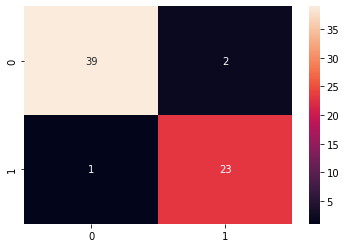

In [ ]:
sns.heatmap(mat,annot=True)

In [ ]:
score=accuracy_score(y_test,y_pred) 
score  

0.9538461538461539

In [ ]:
report=classification_report(y_test,y_pred)
print(report)      

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.92      0.96      0.94        24

    accuracy                           0.95        65
   macro avg       0.95      0.95      0.95        65
weighted avg       0.95      0.95      0.95        65



**IMPLEMENTATION**

Enter URL of the image:/content/drive/MyDrive/with_mask_1797.jpg


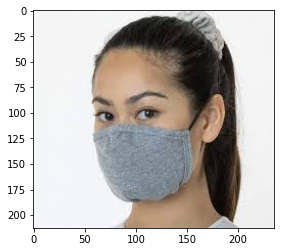

THE PREDICTED IMAGE IS: MASKS_ON


In [ ]:
url=input("Enter URL of the image:")
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
print("THE PREDICTED IMAGE IS:",categories[model.predict(l)[0]])


Enter URL of the image:/content/drive/MyDrive/without_mask_1695.jpg


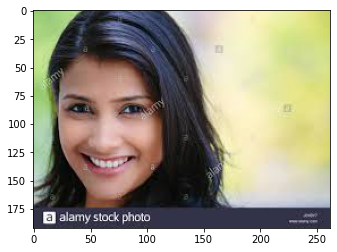

THE PREDICTED IMAGE IS: MASKS_OFF


In [ ]:
url1=input("Enter URL of the image:")
img=imread(url1)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
print("THE PREDICTED IMAGE IS:",categories[model.predict(l)[0]])

**CONCLUSION: SVM model with 95% accuracy is assembled and trained to classify images with or without masks.**
